In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("ex2data2.txt", header=None)
data.columns = ["Test1", "Test2", "Accepted"]

In [8]:
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


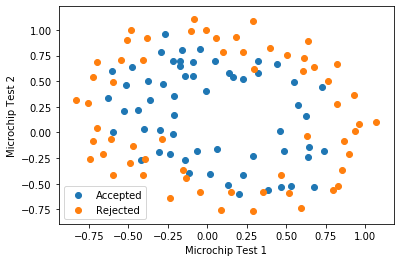

In [21]:
plt.scatter(data[data["Accepted"] == 1]["Test1"], data[data["Accepted"] == 1]["Test2"], label="Accepted")
plt.scatter(data[data["Accepted"] == 0]["Test1"], data[data["Accepted"] == 0]["Test2"], label="Rejected")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="lower left")

In [23]:
X = data[["Test1", "Test2"]]
y = data["Accepted"]

In [39]:
test = X.copy()

for i in range(2, 7):
    test["Test1_" + str(i)] = test["Test1"] ** i
    test["Test2_" + str(i)] = test["Test2"] ** i


In [40]:
test.head()

,Test1,Test2,Test1_2,Test2_2,Test1_3,Test2_3,Test1_4,Test2_4,Test1_5,Test2_5,Test1_6,Test2_6
0,0.051267,0.69956,0.002628,0.489384,0.000135,0.342354,0.000007,0.239497,3.541519e-07,0.167542,1.815630e-08,0.117206
1,-0.092742,0.68494,0.008601,0.469143,-0.000798,0.321335,0.000074,0.220095,-6.860919e-06,0.150752,6.362953e-07,0.103256
2,-0.213710,0.69225,0.045672,0.479210,-0.009761,0.331733,0.002086,0.229642,-4.457837e-04,0.158970,9.526844e-05,0.110047
3,-0.375000,0.50219,0.140625,0.252195,-0.052734,0.126650,0.019775,0.063602,-7.415771e-03,0.031940,2.780914e-03,0.016040
4,-0.513250,0.46564,0.263426,0.216821,-0.135203,0.100960,0.069393,0.047011,-3.561597e-02,0.021890,1.827990e-02,0.010193


In [ ]:
# degree = 6;
# out = ones(size(X1(:,1)));
# for i = 1:degree
#     for j = 0:i
#         out(:, end+1) = (X1.^(i-j)).*(X2.^j);
#     end
# end

# end

In [49]:
X

,Test1,Test2
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [53]:
X["Test1"][0]
X["Test2"][0]

0.6995600000000001

In [96]:
def map_feature(X1, X2):
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)
    
new_data = map_feature(X["Test1"], X["Test2"])

In [94]:
degree = 6

# out = np.ones((len(X), 28))
out = pd.DataFrame()

# print(out.shape)
for i in range(0, degree + 1):
    for j in range(0, i + 1):
#         print("test", i, j)
#         print(X["Test1"][0] ** (i - j) * X["Test1"][0] ** j)
#         print(X["Test1"] ** (i - j) * X["Test1"] ** j)
#         print(out[:1])

        out["Test1_" + str(i) + str(j)] = X["Test1"] ** (i - j) * X["Test1"] ** j
        out["Test2_" + str(i) + str(j)] = X["Test2"] ** (i - j) * X["Test2"] ** j    

In [95]:
out

,Test1_00,Test2_00,Test1_10,Test2_10,Test1_11,Test2_11,Test1_20,Test2_20,Test1_21,Test2_21,...,Test1_62,Test2_62,Test1_63,Test2_63,Test1_64,Test2_64,Test1_65,Test2_65,Test1_66,Test2_66
0,1.0,1.0,0.051267,0.699560,0.051267,0.699560,0.002628,0.489384,0.002628,0.489384,...,1.815630e-08,1.172060e-01,1.815630e-08,1.172060e-01,1.815630e-08,1.172060e-01,1.815630e-08,1.172060e-01,1.815630e-08,1.172060e-01
1,1.0,1.0,-0.092742,0.684940,-0.092742,0.684940,0.008601,0.469143,0.008601,0.469143,...,6.362953e-07,1.032560e-01,6.362953e-07,1.032560e-01,6.362953e-07,1.032560e-01,6.362953e-07,1.032560e-01,6.362953e-07,1.032560e-01
2,1.0,1.0,-0.213710,0.692250,-0.213710,0.692250,0.045672,0.479210,0.045672,0.479210,...,9.526844e-05,1.100469e-01,9.526844e-05,1.100469e-01,9.526844e-05,1.100469e-01,9.526844e-05,1.100469e-01,9.526844e-05,1.100469e-01
3,1.0,1.0,-0.375000,0.502190,-0.375000,0.502190,0.140625,0.252195,0.140625,0.252195,...,2.780914e-03,1.604015e-02,2.780914e-03,1.604015e-02,2.780914e-03,1.604015e-02,2.780914e-03,1.604015e-02,2.780914e-03,1.604015e-02
4,1.0,1.0,-0.513250,0.465640,-0.513250,0.465640,0.263426,0.216821,0.263426,0.216821,...,1.827990e-02,1.019299e-02,1.827990e-02,1.019299e-02,1.827990e-02,1.019299e-02,1.827990e-02,1.019299e-02,1.827990e-02,1.019299e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.0,1.0,-0.720620,0.538740,-0.720620,0.538740,0.519293,0.290241,0.519293,0.290241,...,1.400354e-01,2.444980e-02,1.400354e-01,2.444980e-02,1.400354e-01,2.444980e-02,1.400354e-01,2.444980e-02,1.400354e-01,2.444980e-02
114,1.0,1.0,-0.593890,0.494880,-0.593890,0.494880,0.352705,0.244906,0.352705,0.244906,...,4.387691e-02,1.468924e-02,4.387691e-02,1.468924e-02,4.387691e-02,1.468924e-02,4.387691e-02,1.468924e-02,4.387691e-02,1.468924e-02
115,1.0,1.0,-0.484450,0.999270,-0.484450,0.999270,0.234692,0.998541,0.234692,0.998541,...,1.292688e-02,9.956280e-01,1.292688e-02,9.956280e-01,1.292688e-02,9.956280e-01,1.292688e-02,9.956280e-01,1.292688e-02,9.956280e-01
116,1.0,1.0,-0.006336,0.999270,-0.006336,0.999270,0.000040,0.998541,0.000040,0.998541,...,6.472253e-14,9.956280e-01,6.472253e-14,9.956280e-01,6.472253e-14,9.956280e-01,6.472253e-14,9.956280e-01,6.472253e-14,9.956280e-01
